<h3 align='center'> Time Series Using Statsmodels </h3>

<h4> Statsmodel libraries can be used for time series forecasting. </h4>

Statsmodels is the Python modeule that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests and statistical data exploration 

In this whole section, we will go through:

   - Introduction to Statsmodels 
   - ETS Decomposition 
   - <h5> Moving Averages </h5>
   - Holt WInter Methods
   - Statsmodels Time Series Exercises

<h4> 3. Moving Averages </h4>

Let us we have thousands of airline passanger dataset, we can use <b><i> Simple Moving Averages (SMA) </i></b>

 - Based on window size (larger - can check trend or smaller - can check seasonality)
 
<b> Don't think this SMA analysis as forecasting technique. Just consider this as generalized model to describe general behaviour of your time series dataset </b>

However, SMA consider entire model to be constrained for the same window size thus we can <b><i> expand this SMA analysis to more sophisticated analysis EWMA - Exponentially weighted moving average </i></b>.

Other disadvantages of SMA are:

 - Smaller window sizes will lead to more noise rather than signal.
 - Never reach to full peak or valley of the data due to averaging.
 - In reality, it doesn't tell about future behaviour (only generalized model).
 - Extreme Historical values can skew SMA significantly

<b> In EWMA </b> we consider recent data to be more weigthed as compared to old data. It allows to reduce lag effect from SMA and put more weigth on values that occured more recently.

<b> Amount of weight applied depends upon actual parameters used in EWMA and number of periods given in window size </b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('airline_passengers.csv',index_col='Month')
df.head()

,Thousands of Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [4]:
df.dropna()
df.index=pd.to_datetime(df.index)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Introducing new columns to dataframe like 6 month 12 month trends

<h4> SMA </h4>

In [5]:
df['6-month-SMA']=df['Thousands of Passengers'].rolling(window=6).mean()

In [6]:
df['12-month-SMA']=df['Thousands of Passengers'].rolling(window=12).mean()

<AxesSubplot:xlabel='Month'>

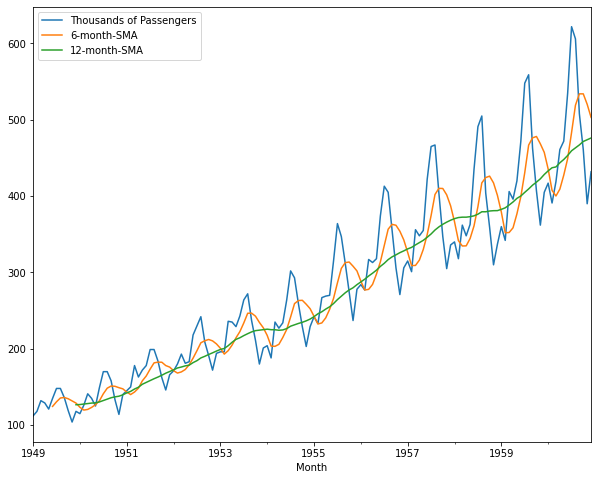

In [7]:
df.plot(figsize=(10,8))

<h4> EWMA </h4>

In [8]:
df['EWMA-12']=df['Thousands of Passengers'].ewm(span=12).mean()

<AxesSubplot:xlabel='Month'>

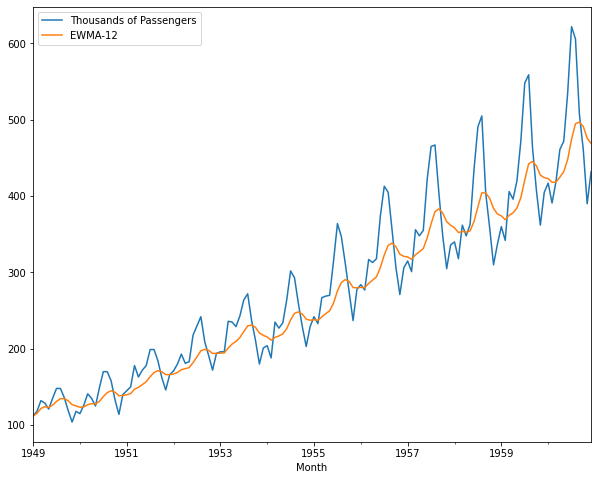

In [9]:
df[['Thousands of Passengers','EWMA-12']].plot(figsize=(10,8))

EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size.
[Full details on Mathematics behind this can be found here](http://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#exponentially-weighted-windows).
Here is the shorter version of the explanation behind EWMA.

The formula for EWMA is:
### $y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$

Where $x_t$ is the input value, $w_i$ is the applied weight (Note how it can change from $i=0$ to $t$), and $y_t$ is the output.

Now the question is, how to we define the weight term $w_i$?

This depends on the <tt>adjust</tt> parameter you provide to the <tt>.ewm()</tt> method.

When <tt>adjust=True</tt> (default) is used, weighted averages are calculated using weights equal to $w_i = (1 - \alpha)^i$

which gives

### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$

When <tt>adjust=False</tt> is specified, moving averages are calculated as:

### $\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

which is equivalent to using weights:

 \begin{split}w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{if } i < t \\
    (1 - \alpha)^i        & \text{if } i = t.
\end{cases}\end{split}

When <tt>adjust=True</tt> we have $y_0=x_0$ and from the last representation above we have 
$y_t=\alpha x_t+(1−α)y_{t−1}$, therefore there is an assumption that $x_0$ is not an ordinary value but rather an exponentially weighted moment of the infinite series up to that point.

For the smoothing factor $\alpha$ one must have $0<\alpha≤1$, and while it is possible to pass <em>alpha</em> directly, it’s often easier to think about either the <em>span</em>, <em>center of mass</em> (com) or <em>half-life</em> of an EW moment:

\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{for span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{for center of mass}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{for half-life}\ h > 0
 \end{cases}\end{split}
 
* <strong>Span</strong> corresponds to what is commonly called an “N-day EW moving average”.
* <strong>Center of mass</strong> has a more physical interpretation and can be thought of in terms of span: $c=(s−1)/2$
* <strong>Half-life</strong> is the period of time for the exponential weight to reduce to one half.
* <strong>Alpha</strong> specifies the smoothing factor directly.

We have to pass precisely one of the above into the <tt>.ewm()</tt> function. For our data we'll use <tt>span=12</tt>.

In [10]:
df['EWMA-12-adjustFalse']=df['Thousands of Passengers'].ewm(span=12,adjust=False).mean()

<AxesSubplot:xlabel='Month'>

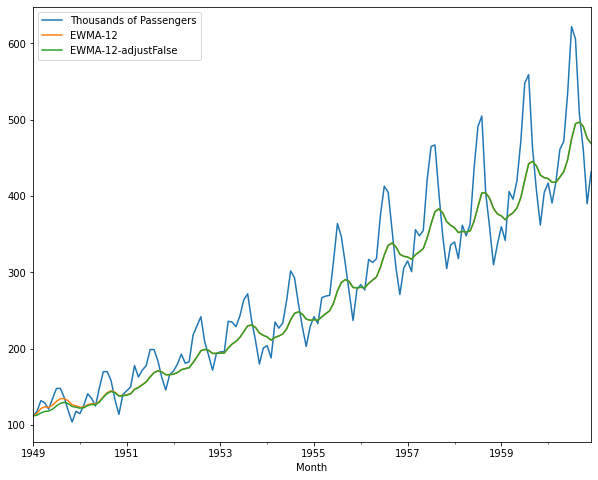

In [11]:
df[['Thousands of Passengers','EWMA-12','EWMA-12-adjustFalse']].plot(figsize=(10,8))

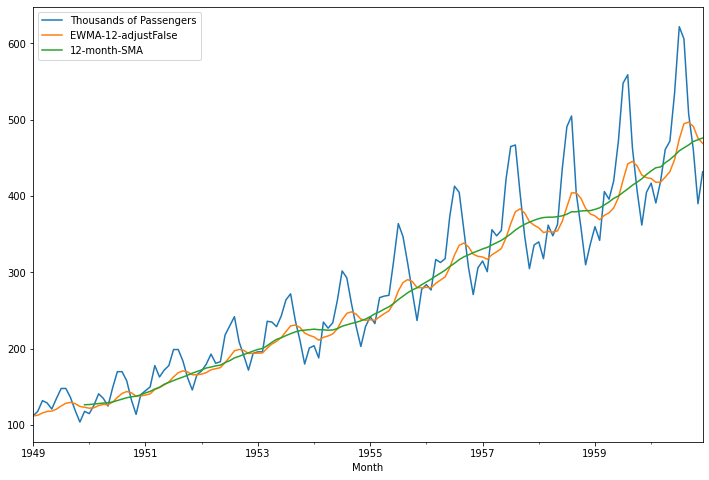

In [12]:
# Comparing SMA with EWMA

df[['Thousands of Passengers','EWMA-12-adjustFalse','12-month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);